# CaSpER 실행용 튜토리얼

In [2]:
suppressWarnings(suppressMessages(library(Seurat)))
suppressWarnings(suppressMessages(library(CaSpER)))
suppressWarnings(suppressMessages(data("hg19_cytoband")))

In [ ]:
#wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE110nnn/GSE110499/suppl/GSE110499_GEO_processed_MM_10X_raw_UMI_count_martix.txt.gz
#gunzip GSE110499_GEO_processed_MM_10X_raw_UMI_count_martix.txt.gz

In [4]:
# expression data is downloaded from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE110499
counts  <- read.delim("GSE110499_GEO_processed_MM_10X_raw_UMI_count_martix.txt", stringsAsFactor=F, header=T)
rownames(counts) <- counts[, 1] 
counts <- counts[, -1]

In [6]:
counts[1:10,1:10]

AAACCTGTCAAACGGG AAACCTGTCACTTATC AAACCTGTCGAACGGA
RP11-34P13.3  0                0                0               
FAM138A       0                0                0               
OR4F5         0                0                0               
RP11-34P13.7  0                0                0               
RP11-34P13.8  0                0                0               
RP11-34P13.14 0                0                0               
RP11-34P13.9  0                0                0               
FO538757.3    0                0                0               
FO538757.2    0                0                0               
AP006222.2    0                0                0               
              AAAGATGAGAATTGTG AAAGATGAGAGTACAT AAAGATGGTAAGAGAG
RP11-34P13.3  0                0                0               
FAM138A       0                0                0               
OR4F5         0                0                0               
RP11-34P13.7  0                0                0               
RP11-34P13.8  0                0                0               
RP11-34P13.14 0                0                0               
RP11-34P13.9  0                0                0               
FO538757.3    0                0                0               
FO538757.2    0                0                0               
AP006222.2    0                0                0               
              AAAGATGGTGTGCGTC AAAGATGTCGTGGGAA AAAGCAAAGACGCTTT
RP11-34P13.3  0                0                0               
FAM138A       0                0                0               
OR4F5         0                0                0               
RP11-34P13.7  0                0                0               
RP11-34P13.8  0                0                0               
RP11-34P13.14 0                0                0               
RP11-34P13.9  0                0                0               
FO538757.3    0                0                0               
FO538757.2    0                0                0               
AP006222.2    0                0                0               
              AAAGCAATCCAGTATG
RP11-34P13.3  0               
FAM138A       0               
OR4F5         0               
RP11-34P13.7  0               
RP11-34P13.8  0               
RP11-34P13.14 0               
RP11-34P13.9  0               
FO538757.3    0               
FO538757.2    0               
AP006222.2    0

In [7]:
mm135 <- CreateSeuratObject(counts = counts, project = "mm135", min.cells = 3, min.features = 200)
mm135[["percent.mt"]] <- PercentageFeatureSet(mm135, pattern = "^MT-")
mm135 <- subset(mm135, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)
mm135 <- NormalizeData(mm135 , scale.factor = 1e6, normalization.method = "RC")
mm135 <- FindVariableFeatures(mm135, do.plot = T, nfeatures = 1000)
mm135 <- ScaleData(mm135)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“The following arguments are not used: do.plot”
Centering and scaling data matrix



PC_ 1 
Positive:  IGLC3, SSR4, IGHA1, IGHA2, SEC11C, MZB1, MANF, FKBP11, KRTCAP2, MTDH 
	   MYDGF, PRDX4, FKBP2, ERLEC1, DNAJB9, JSRP1, ITM2C, HERPUD1, EDNRB, HLA-C 
	   HSP90B1, AL928768.3, DERL3, SDC1, PDIA4, PHGDH, SCAPER, PAIP2B, TXNDC11, ARID5B 
Negative:  TYROBP, FTH1, FCER1G, ACTB, COTL1, TMSB4X, SH3BGRL3, S100A4, FCN1, EIF1 
	   TYMP, TSPO, AIF1, CSTA, ARPC1B, SPI1, LST1, FTL, S100A11, LCP1 
	   SAT1, ZEB2, CFP, CD68, TKT, NAMPT, STXBP2, SERPINA1, LINC00936, CLEC12A 
PC_ 2 
Positive:  HBB, AHSP, HBA1, HBA2, HMBS, SLC4A1, HBD, EPB42, BLVRB, FECH 
	   ALAS2, CA1, HBM, UBB, SNCA, SLC25A37, SELENBP1, PRDX2, HEMGN, TSPO2 
	   FAM210B, GYPA, NFE2, STRADB, BNIP3L, BPGM, TMCC2, SLC14A1, RHAG, RHCE 
Negative:  SSR4, IGLC3, HLA-C, SEC11C, IGHA1, IGHA2, MTDH, KRTCAP2, MZB1, MYDGF 
	   FKBP2, MANF, PRDX4, HERPUD1, FKBP11, ERLEC1, MCL1, JSRP1, PABPC4, HSP90B1 
	   FTL, ITM2C, EDNRB, NEAT1, DNAJB9, PDIA4, TXNDC11, CCPG1, SCAPER, RHOB 
PC_ 3 
Positive:  LTB, CD3E, IL32, TRAC, CD3D, CD3G, TRBC

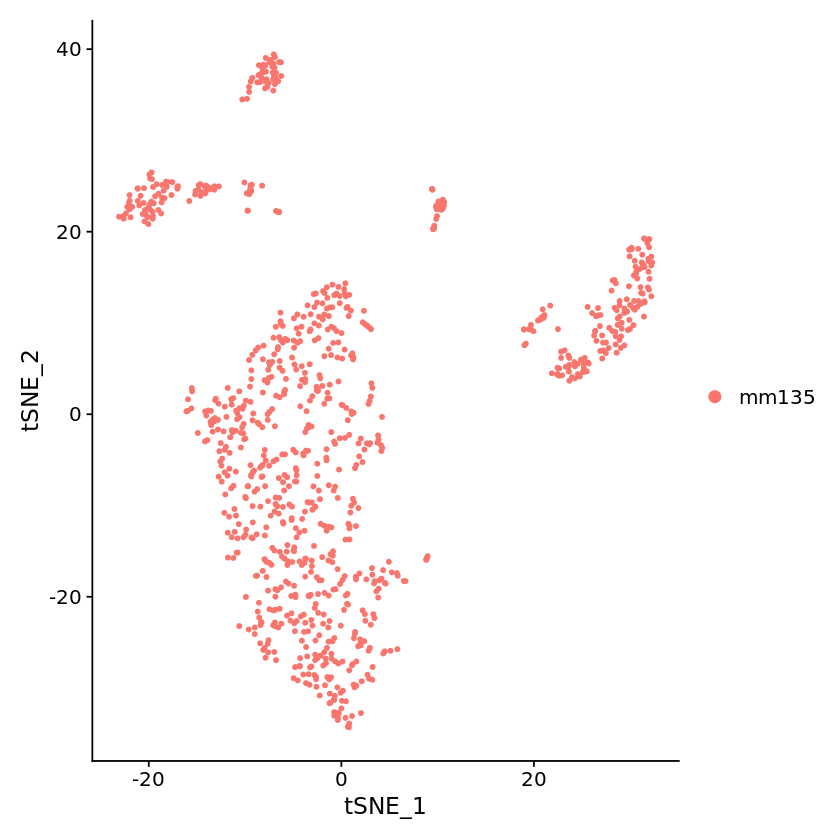

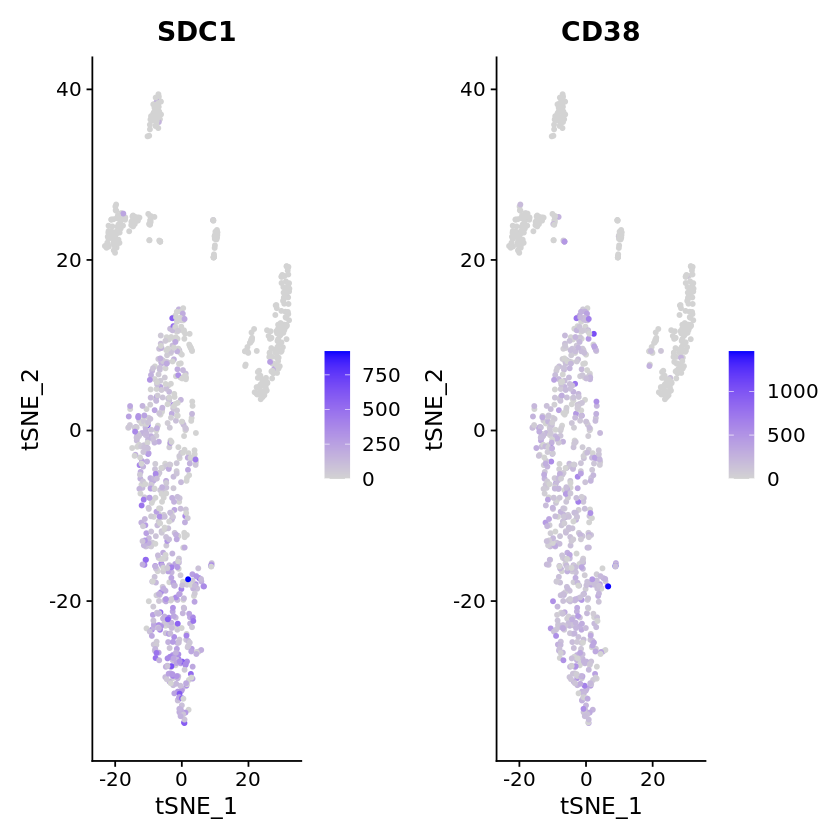

In [8]:
mm135 <- RunPCA(mm135, features = VariableFeatures(object = mm135),npcs = 100)
mm135 <- RunTSNE(mm135, dims.use = 1:10)
DimPlot(mm135, reduction = "tsne")
FeaturePlot(mm135, features = c("SDC1", "CD38"))

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 947
Number of edges: 27262

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8550
Number of communities: 8
Elapsed time: 0 seconds


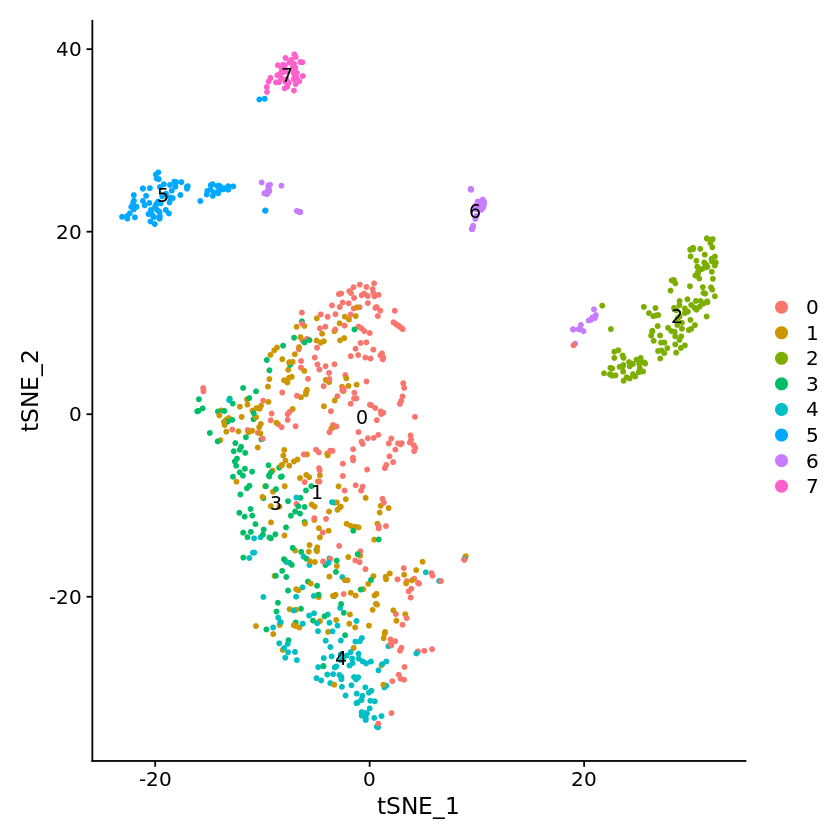

In [9]:
mm135 <- FindNeighbors(mm135, dims = 1:10)
mm135 <- FindClusters(mm135, resolution = 0.5)
DimPlot(mm135, reduction = "tsne", label=T)

In [10]:
log.ge <- as.matrix(mm135@assays$RNA@data)
control <- names(Idents(mm135) )[Idents(mm135) %in% c(2,7)]

In [11]:
genes <- rownames(log.ge)
annotation <- generateAnnotation(id_type="hgnc_symbol", genes=genes, centromere=centromere, ishg19 = T)
log.ge <- log.ge[match( annotation$Gene,rownames(log.ge)) , ]
rownames(log.ge) <- annotation$Gene
log.ge <- log2(log.ge +1)


Batch submitting query [=======>-----------------------]  25% eta: 10s

Batch submitting query [===============>---------------]  50% eta:  7s

Batch submitting query [======================>--------]  75% eta:  4s
                                                                      



In [12]:
load("maf.rda") ## from https://github.com/akdess/CaSpER/blob/master/data/maf.rda
loh<- list()
loh[[1]] <- maf
names(loh) <- "MM135"
loh.name.mapping <- data.frame (loh.name= "MM135" , sample.name=colnames(log.ge))

In [14]:
head(maf)

chr position alt ref coverage baf       dev      
1 1    14677     5 12   17      0.2941176 0.2058824
2 1   268559    17  0   17      1.0000000 0.5000000
3 1   629218    17 39   56      0.3035714 0.1964286
4 1   629885   168  0  168      1.0000000 0.5000000
5 1   629906   190  2  192      0.9895833 0.4895833
6 1   630490    11 22   33      0.3333333 0.1666667

In [15]:
head(loh.name.mapping)

loh.name sample.name     
1 MM135    AAACCTGTCAAACGGG
2 MM135    AAACCTGTCACTTATC
3 MM135    AAACCTGTCGAACGGA
4 MM135    AAAGATGAGAGTACAT
5 MM135    AAAGATGGTAAGAGAG
6 MM135    AAAGATGGTGTGCGTC

In [17]:
object <- suppressMessages(CreateCasperObject(raw.data=log.ge,loh.name.mapping=loh.name.mapping, sequencing.type="single-cell", 
cnv.scale=3, loh.scale=3, 
expr.cutoff=0.1, filter="median", matrix.type="normalized",
annotation=annotation, method="iterative", loh=loh, 
control.sample.ids=control, cytoband=cytoband))

Warning message in runmed(x, filt$n):
“'k' is bigger than 'n'!  Changing 'k' to 113”
Warning message in runmed(x, filt$n):
“'k' is bigger than 'n'!  Changing 'k' to 113”
Warning message in runmed(x, filt$n):
“'k' is bigger than 'n'!  Changing 'k' to 113”
Warning message in runmed(x, filt$n):
“'k' is bigger than 'n'!  Changing 'k' to 113”
Warning message in runmed(x, filt$n):
“'k' is bigger than 'n'!  Changing 'k' to 113”
Warning message in runmed(x, filt$n):
“'k' is bigger than 'n'!  Changing 'k' to 113”
Warning message in runmed(x, filt$n):
“'k' is bigger than 'n'!  Changing 'k' to 113”
Warning message in runmed(x, filt$n):
“'k' is bigger than 'n'!  Changing 'k' to 113”
Warning message in runmed(x, filt$n):
“'k' is bigger than 'n'!  Changing 'k' to 113”
Warning message in runmed(x, filt$n):
“'k' is bigger than 'n'!  Changing 'k' to 113”
Warning message in runmed(x, filt$n):
“'k' is bigger than 'n'!  Changing 'k' to 113”
Warning message in runmed(x, filt$n):
“'k' is bigger than 'n'!  C

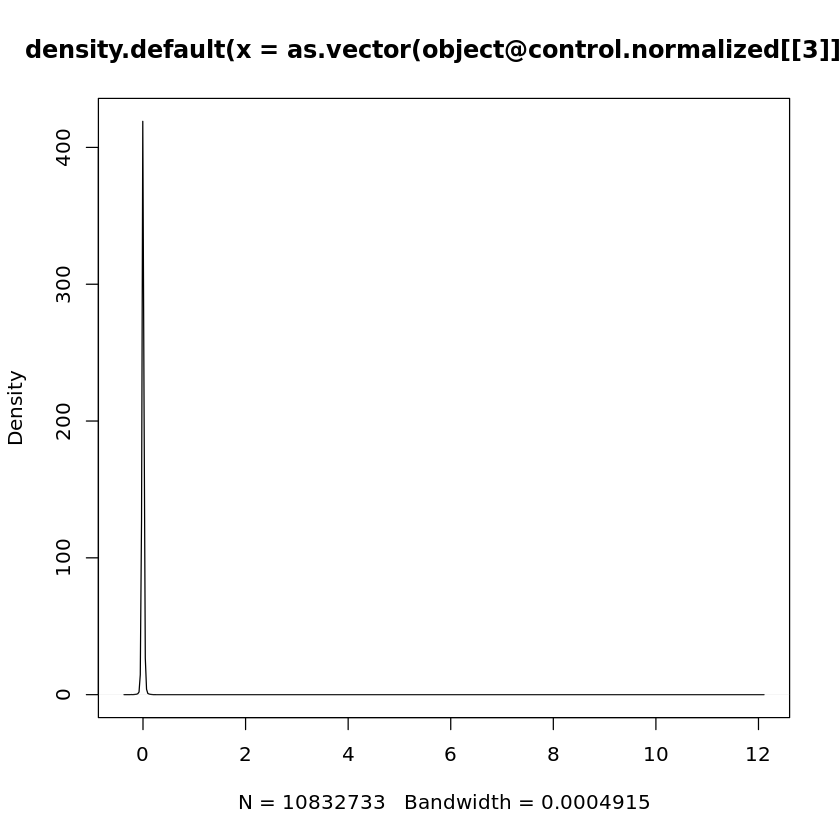

In [18]:
#pdf("MM135.Distrubution.pdf")
plot(density(as.vector(object@control.normalized[[3]])))

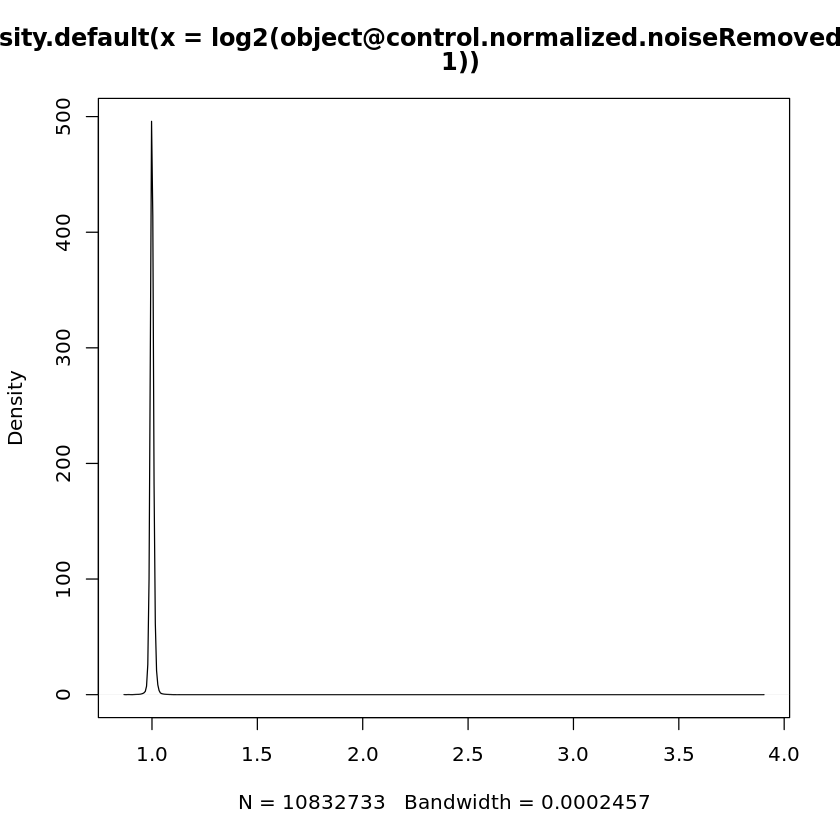

In [19]:
plot(density(log2(object@control.normalized.noiseRemoved[[3]]+1)))
#dev.off()

Performing recursive median filtering...

Performing HMM segmentation...

Processing cnv.scale:1 loh.scale:1...

Processing cnv.scale:2 loh.scale:1...

Processing cnv.scale:3 loh.scale:1...



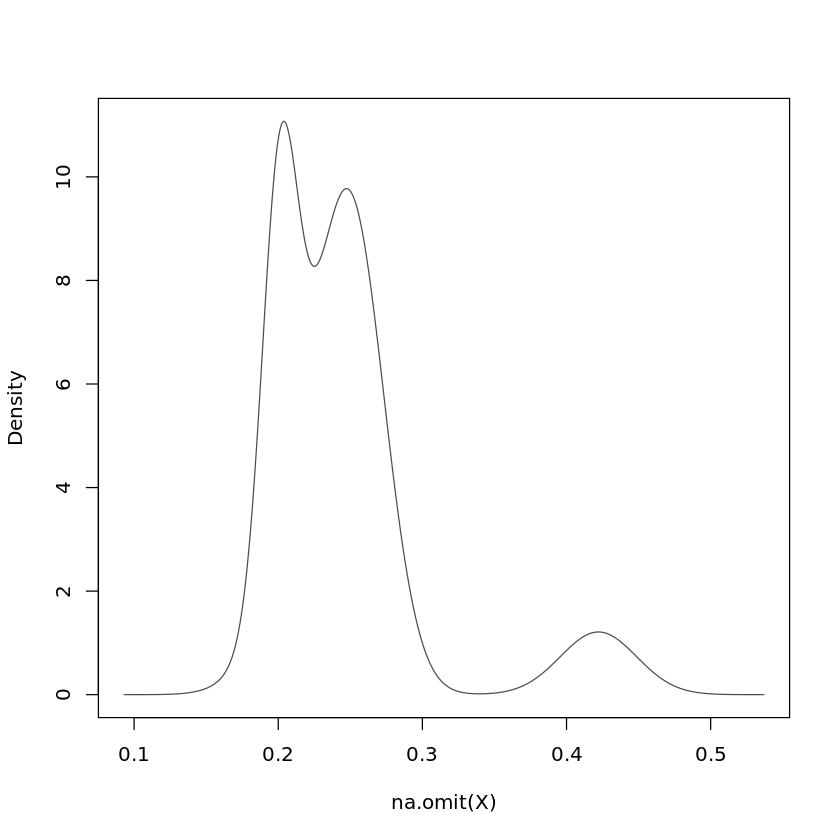

Processing cnv.scale:1 loh.scale:2...



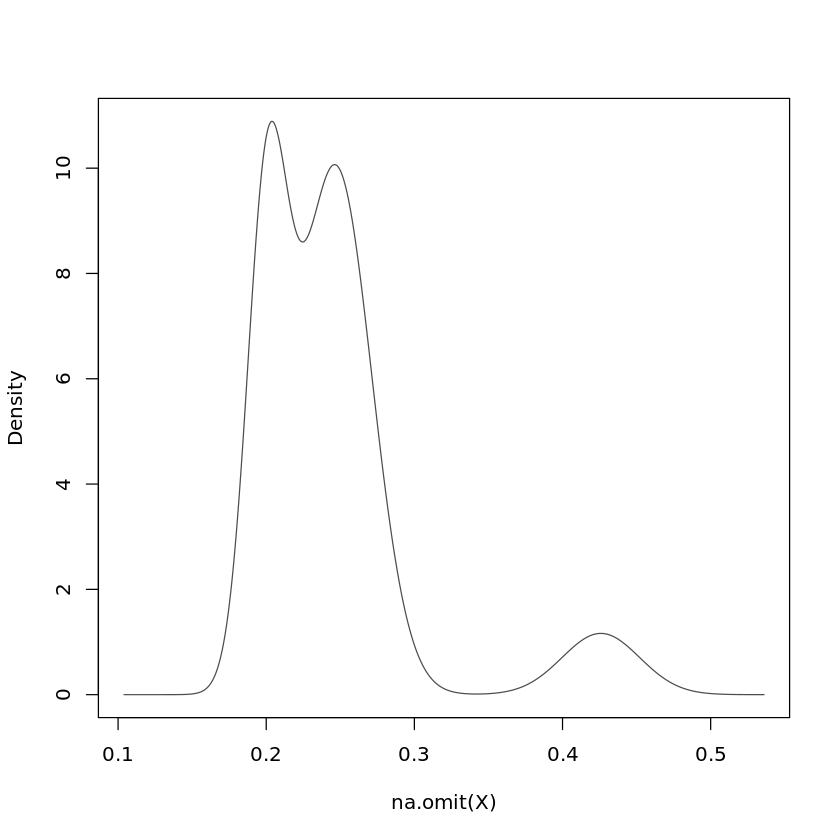

Processing cnv.scale:2 loh.scale:2...



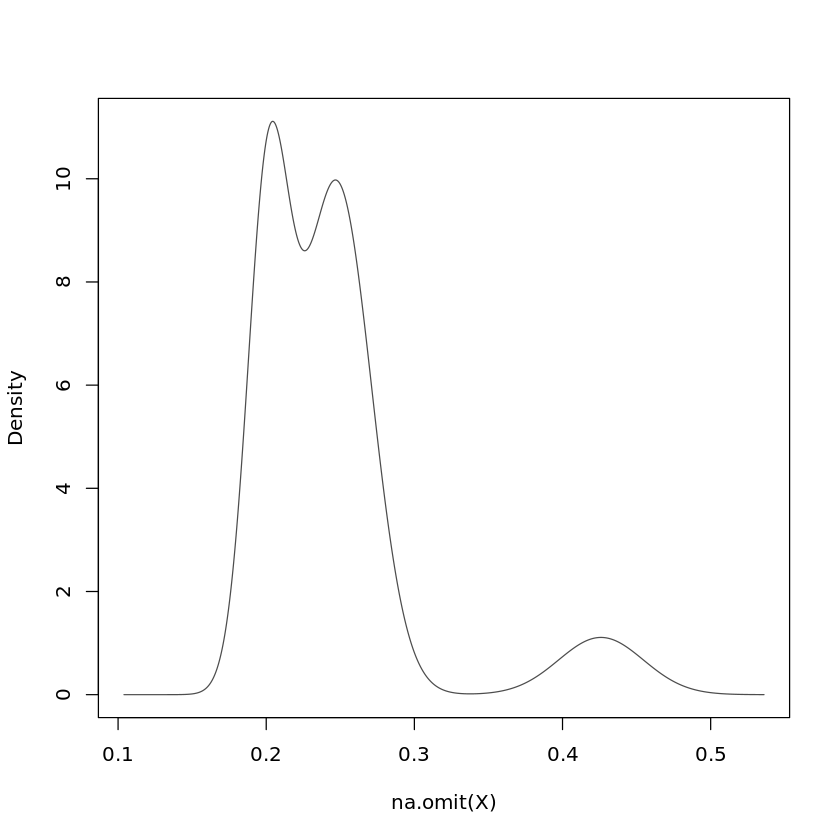

Processing cnv.scale:3 loh.scale:2...



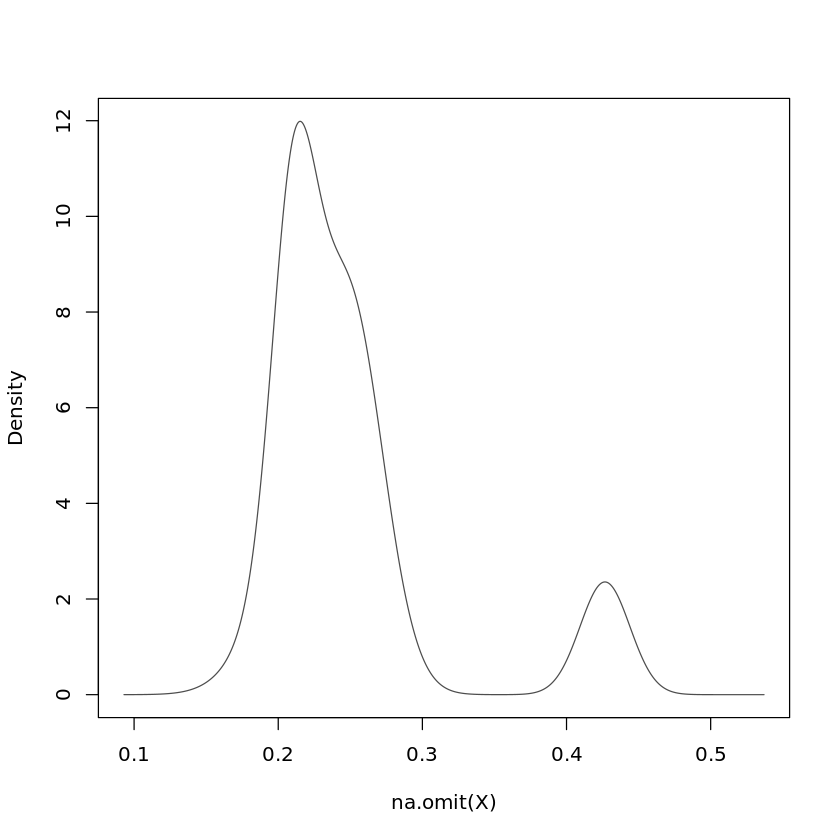

Processing cnv.scale:1 loh.scale:3...



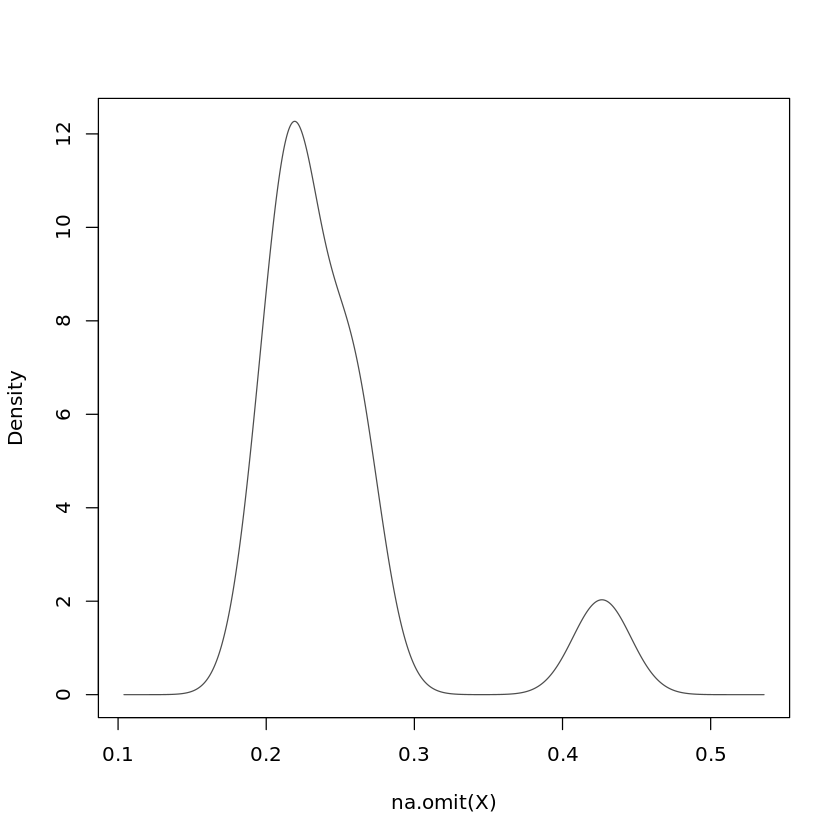

Processing cnv.scale:2 loh.scale:3...



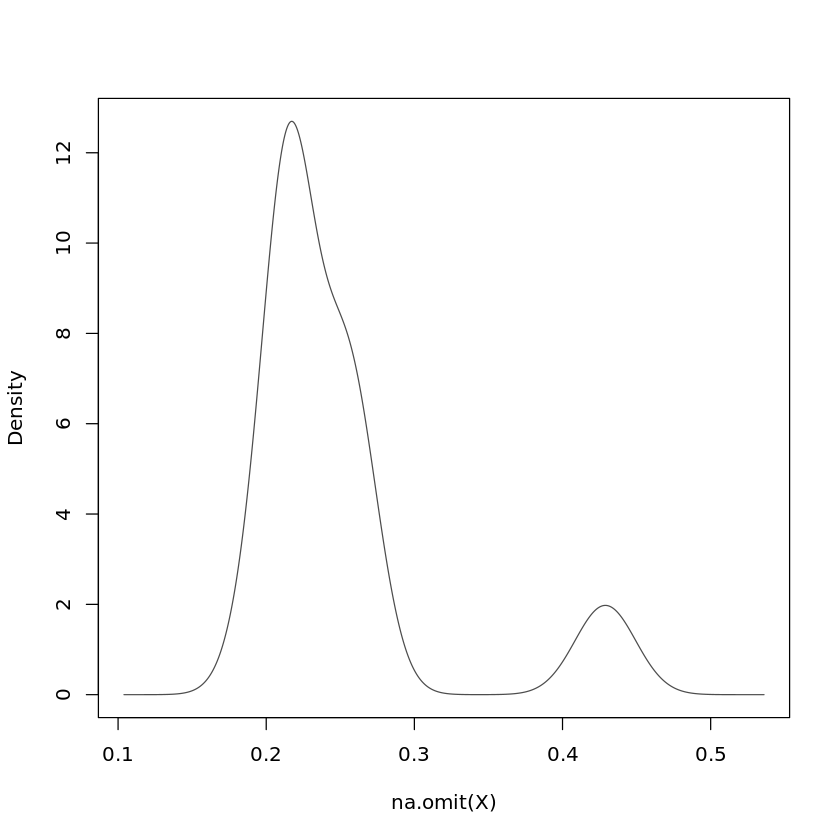

Processing cnv.scale:3 loh.scale:3...



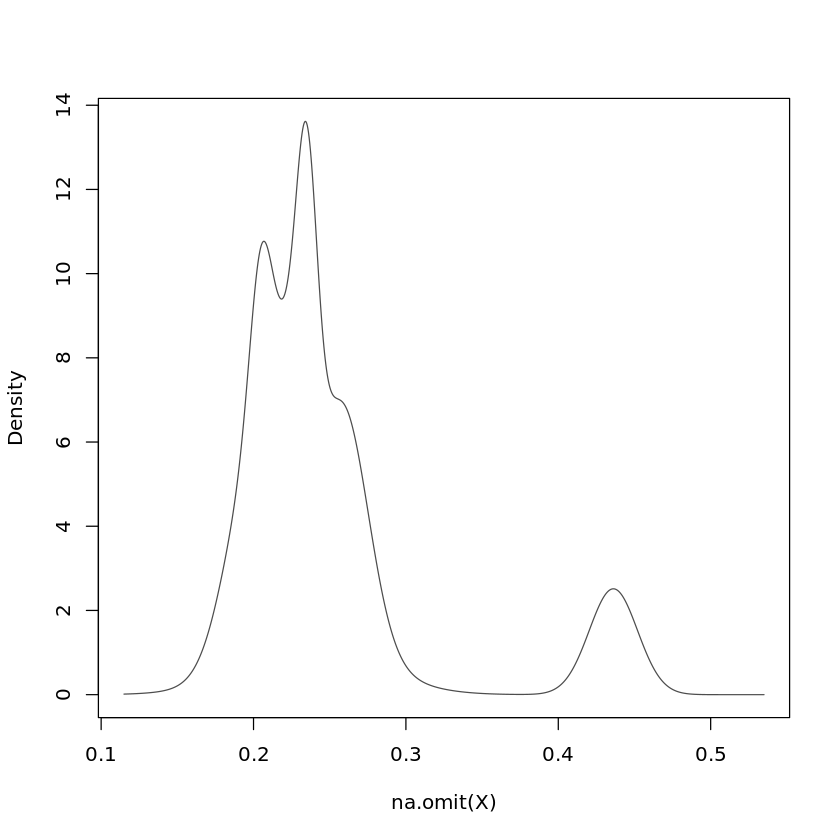

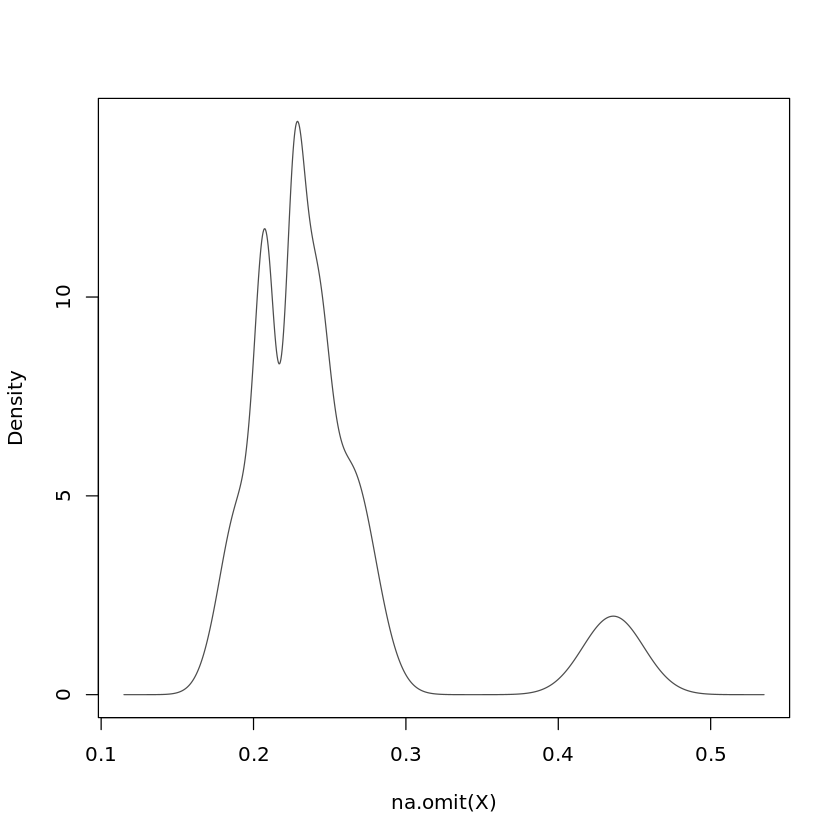

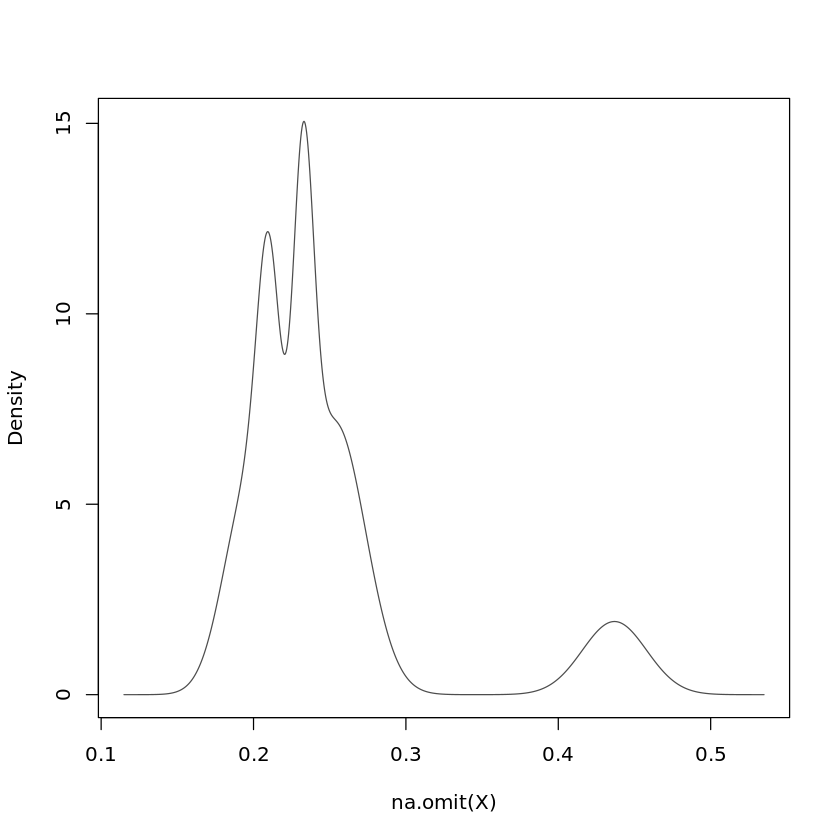

In [20]:
## runCaSpER
final.objects <- runCaSpER(object, removeCentromere=T, cytoband=cytoband, method="iterative")

## summarize large scale events 
finalChrMat <- extractLargeScaleEvents (final.objects, thr=0.75) 

obj <- final.objects[[9]]
plotHeatmap10x(object=obj, fileName="heatmap.png",cnv.scale= 3, cluster_cols = F, cluster_rows = T, show_rownames = T, only_soi = T)

In [24]:
finalChrMat

1p 1q 2p 2q 3p 3q 4p 4q 5p 5q ⋯ 18p 18q 19p 19q 20p 20q 21p
AAACCTGTCAAACGGG  0 0  0  0   0  0 0  0  0  0  ⋯  0   0  0   0   0   0   0  
AAACCTGTCACTTATC  0 0  0  0   0  0 0  0  1  0  ⋯  0   0  0   0   1   0   0  
AAACCTGTCGAACGGA  0 0  0  0   0  0 0  0  0  0  ⋯ -1   0  0   0   0   0   0  
AAAGATGAGAGTACAT  0 0  0  0   0  0 0  0  0  0  ⋯  0   0  0   0   0   0   0  
AAAGATGGTAAGAGAG  0 0  0  0   0  0 0  0  0  0  ⋯ -1   0  0   0   1   0   0  
AAAGATGGTGTGCGTC  0 0  0  0   0  1 0  1  0  0  ⋯  0   0  0   0   0   0   0  
AAAGATGTCGTGGGAA  0 0  0  0   0  0 0  0  0  0  ⋯ -1   0  0   0   0   0   0  
AAAGCAAAGACGCTTT  0 0  0  0   0  0 0  0  0  0  ⋯  0   0  0   0   0   0   0  
AAAGCAATCCAGTATG  0 0  0  0   0 -1 0  0  0  0  ⋯  1   0  0   0   0   0   0  
AAAGTAGCAGTATGCT  0 0  0  0  -1  0 0  0  0  0  ⋯ -1   0  0   0   1   0   0  
AAAGTAGTCAGTTGAC  0 0  0  0   0  0 0  0  0  0  ⋯ -1   0  0   0   1   0   0  
AAATGCCCAACACCCG  0 0  0  0   0  0 0  0  0  0  ⋯  0   0  0   0   0   0   0  
AACACGTAGTCTTGCA  0 0  0  0   0  0 0  0  0  0  ⋯ -1   0  0   0   1   0   0  
AACACGTTCCACGACG  0 0  0  0   0  0 0  0  0  0  ⋯  0   0  0   0   0   0   0  
AACACGTTCCTTTCTC  0 0  0  0   0  0 0  0  0  0  ⋯  0   0  0   0   0   0   0  
AACACGTTCTAGCACA  0 0  0  0   0  0 0  0  0  0  ⋯  0   0  0   0   1   0   0  
AACCATGAGGAGTACC  0 0  0  0   0  0 0  0  0  0  ⋯ -1   0  0   0   0   0   0  
AACCATGCAAGCGAGT  0 0  0  0   0  0 0  0  0  0  ⋯ -1   0  0   0   0   0   0  
AACCGCGGTATGAAAC  0 0  0  0   0  0 0  0  0  0  ⋯  1   0  0   0   0   0   0  
AACCGCGGTATTACCG  0 0  0  0   0  0 0  0  0  0  ⋯ -1   0  0   0   1   0   0  
AACGTTGTCCACGCAG  0 0  0  0   0  0 0  0  0  0  ⋯ -1   0  0   0   0   0   0  
AACTCTTTCGCACTCT  0 0  0  0   0  0 0  0  0  0  ⋯  1   0  0   0   0   0   0  
AACTGGTAGTTCGCGC  0 0  0  0   0  0 1  0  0  0  ⋯  0   0  0   0   1   0   0  
AACTTTCGTTACGACT  0 0  0  0   0  0 0  0  0  0  ⋯  0   0  0   0   0   0   0  
AACTTTCGTTTAAGCC  0 0  0  0   0  0 0  0  0  0  ⋯ -1   0  0   0   0   0   0  
AAGACCTAGAAACCGC  0 0  0  0   0  0 0  0  1  0  ⋯ -1  -1  0   0   1   0   0  
AAGACCTAGGTAGCCA  0 0  0  0   0  0 0  0  1  0  ⋯ -1  -1  0   0   1   0   0  
AAGACCTCACAAGCCC  0 0  0  0   0  0 0  0  0  0  ⋯  0   0  0   0   0   0   0  
AAGCCGCAGGGATACC -1 0  0  0   0  0 0  0  0  0  ⋯ -1   0  0   0   0   0   0  
AAGCCGCAGTCTCCTC  0 0  0  0   0  0 0  0  0  0  ⋯  0   0  0   0   0   0   0  
⋮                ⋮  ⋮  ⋮  ⋮  ⋮  ⋮  ⋮  ⋮  ⋮  ⋮  ⋱ ⋮   ⋮   ⋮   ⋮   ⋮   ⋮   ⋮  
TTAGTTCGTGCCTTGG 0  0  0   0  0 0  0  0  0   0 ⋯  0   0  0   0    0   0  0  
TTATGCTAGTACGACG 0  0  0   0  0 0  0  0  0  -1 ⋯  0   0  0   0    1   0  0  
TTCTACAGTAGCAAAT 0  0  0   0  0 0  0  0  0   0 ⋯ -1   0  0   0    0   0  0  
TTCTCAATCGGAGGTA 0  0  0   0 -1 0  0  0  0   0 ⋯ -1   0  0   0   -1   0  0  
TTCTCCTAGGAATTAC 0  0  0   0  0 0  0  0  0   0 ⋯ -1   0  0   0    0   0  0  
TTCTTAGTCATTTGGG 0  0  0   0  0 0  0  0  0   0 ⋯ -1   0  0   0    0   0  0  
TTCTTAGTCCACGTGG 0  0  0   0  1 1  0  0  0   1 ⋯  1   0  0   0    1   0  0  
TTGAACGCACCAGGCT 0  0  0   0  0 0  0  0  0   0 ⋯  1   0  0   0    0   0  0  
TTGACTTTCCACGCAG 0  0  0   0  0 0  0  0  0   0 ⋯  0   0  0   0    0   0  0  
TTGACTTTCGAATGGG 1  0  0   0  0 1  0  0  1   0 ⋯ -1   0  0   0    1   0  0  
TTGCCGTAGAGTAAGG 0  0  0   0  0 0  0  0  1   0 ⋯ -1   0  0   0    0   0  0  
TTGGAACCACTTAAGC 0  0  0   0  0 0  0  0  0   0 ⋯ -1   0  0   0    0   0  0  
TTGGAACCATTCACTT 0  0  0   0  0 0  0  0  1   0 ⋯ -1   0  0   0    1   0  0  
TTGGCAAAGGATGTAT 0  0  0   0  0 0  0  0  0   0 ⋯  0   0  0   0    0   0  0  
TTGGCAAAGTCTCAAC 0  0  0   0  0 0  0  0  0   0 ⋯  1   0  0   0    0   0  0  
TTGGCAAGTACAGCAG 0  0  0   0  0 0  0  0  1   0 ⋯  1   0  0   0    1   0  0  
TTGGCAATCAGCATGT 0  0  0   0  0 0  0  0  0  -1 ⋯ -1  -1  0   0    1   0  0  
TTGGCAATCGGAATCT 0  0  1   0  0 0  0  0  0   0 ⋯  0   0  0   0    0   0  0  
TTTACTGAGATACACA 0  0  0   0  0 0  0  0  0   0 ⋯  0   0  0   0    0   0  0  
TTTACTGAGCCGATTT 0  0  0   0  0 0  0  0  0   0 ⋯ -1  -1  0   0    1  -1  0  
TTTACTGCAATGC

In [21]:
#### VISUALIZATION 
chrMat <- finalChrMat
plot.data <- melt(chrMat)
plot.data$value2 <- "neutral"
plot.data$value2[plot.data$value > 0] <- "amplification"
plot.data$value2[plot.data$value < 0] <- "deletion"
plot.data$value2 <- factor(plot.data$value2, levels = c("amplification", 
    "deletion", "neutral"))
plot.data$X2 <- factor(plot.data$X2, levels = colnames(chrMat))

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”


In [22]:
p <- ggplot(aes(x = X2, y = X1, fill = value2), data = plot.data) + 
    geom_tile(colour = "white", size = 0.01) + 
    labs(x = "", 
    y = "") + scale_fill_manual(values = c(amplification = muted("red"), 
    deletion = muted("blue"), neutral = "white")) + theme_grey(base_size = 6) + 
    theme(legend.position = "right", legend.direction = "vertical", 
        legend.title = element_blank(), strip.text.x = element_blank(), 
        legend.text = element_text(colour = "black", size = 7, 
            face = "bold"), legend.key.height = grid::unit(0.8, 
            "cm"), legend.key.width = grid::unit(0.5, "cm"), 
        axis.text.x = element_text(size = 5, colour = "black", 
            angle = -45, hjust = 0), axis.text.y = element_text(size = 6, 
            vjust = 0.2, colour = "black"), axis.ticks = element_line(size = 0.4), 
        plot.title = element_text(colour = "black", hjust = 0, 
            size = 6, face = "bold"))

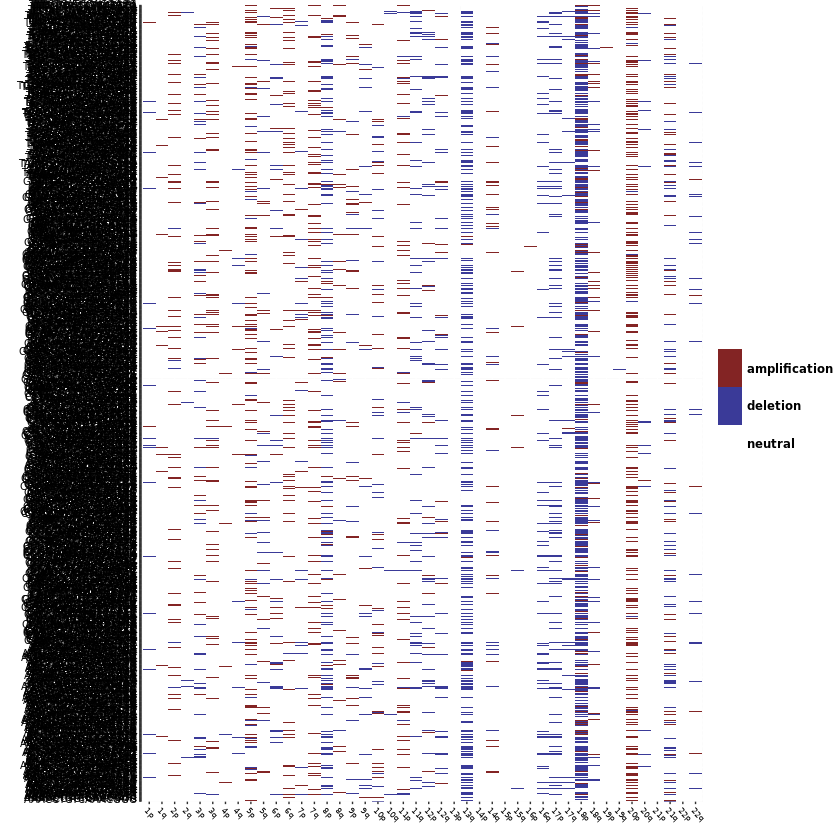

In [23]:
p